In [12]:
import cv2
import random 

In [8]:
import h5py
import os
import numpy as np

In [10]:
import sys
sys.path.append("../project_behaviour/Code/")

# Import functions for handling skeleton files
from data_handling import read_skeleton_as_array, calc_quality, del_nan_rows 
# Import functions for computing features
from extract_angles import get_bend_angles, get_tan_angles, savgol_skeleton
from extract_curvatures import get_curv_savgol

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fnames = ['20180727_120042_1_5m0s_None_None_None_skeletons.hdf5',
'20180710_160233_1_5m0s_None_None_None_skeletons.hdf5',
'20180817_121415_1_15m0s_None_None_None_skeletons.hdf5',
 '20180823_100828_1_15m0s_None_None_None_skeletons.hdf5',
 '20180806_181015_1_5m0s_None_None_None_skeletons.hdf5',
 '20180808_114234_1_15m0s_None_None_None_skeletons.hdf5',
 '20180705_123548_1_5m0s_None_None_None_skeletons.hdf5',
 '20180725_100249_1_5m0s_None_None_None_skeletons.hdf5',
 '20180709_102900_1_15m0s_None_None_None_skeletons.hdf5',
 '20180806_133006_1_15m0s_None_None_None_skeletons.hdf5',
 '20180730_113126_1_5m0s_None_None_None_skeletons.hdf5',
 '20180808_123808_1_5m0s_None_None_None_skeletons.hdf5',
 '20180730_103154_1_15m0s_None_None_None_skeletons.hdf5',
 '20180725_101259_1_5m0s_None_None_None_skeletons.hdf5',
 '20180725_140051_1_5m0s_None_None_None_skeletons.hdf5',
 '20180716_164934_1_5m0s_None_None_None_skeletons.hdf5',
 '20180725_102308_1_15m0s_None_None_None_skeletons.hdf5',
 '20180716_151220_1_5m0s_None_None_None_INVERTED_skeletons.hdf5',
 '20180727_111515_1_5m0s_None_None_None_skeletons.hdf5',
 '20180817_131450_1_5m0s_None_None_None_skeletons.hdf5',
 '20180817_093829_1_15m0s_None_None_None_skeletons.hdf5',
 '20180926_102013_1_5m0s_None_None_None_INVERTED_skeletons.hdf5',
 '20180725_124421_1_5m0s_None_None_None_skeletons.hdf5',
 '20180823_102346_1_5m0s_None_None_None_skeletons.hdf5',
 '20180727_115032_1_5m0s_None_None_None_skeletons.hdf5',
 '20180823_125812_1_5m0s_None_None_None_skeletons.hdf5',
 '20180706_112803_1_5m0s_None_None_None_skeletons.hdf5']

In [4]:
skel_files_path = '/share/data/temp/athira/Tierpsy_skeleton_files_July13/'


In [13]:
curv_list = []
skel_list = []
con1_list = []
con2_list = []

for fn in fnames[:10]:
    skel_file = os.path.join(skel_files_path,fn)
    
    skel_obj = h5py.File(skel_file,'r')
    contour1_array = np.array(skel_obj['contour_side1'])
    contour2_array = np.array(skel_obj['contour_side2'])
    skel_array = read_skeleton_as_array(skel_file)
    skel_list.append(skel_array)
    con1_list.append(contour1_array)
    con2_list.append(contour2_array)

In [14]:
skel_array_comb = np.vstack(skel_list)
con1_array_comb = np.vstack(con1_list)
con2_array_comb = np.vstack(con2_list)

In [26]:
inds = random.sample(range(skel_array_comb.shape[0]),10)

In [43]:
skel_savgol = savgol_skeleton(skel_array_comb)
cont1_savgol = savgol_skeleton(con1_array_comb)
cont2_savgol = savgol_skeleton(con2_array_comb)

cont1_savgol[:,0,:] = skel_savgol[:,0,:]
cont2_savgol[:,0,:] = skel_savgol[:,0,:]

cont1_savgol[:,-1,:] = skel_savgol[:,-1,:]
cont2_savgol[:,-1,:] = skel_savgol[:,-1,:]

In [52]:
skel_samples = skel_savgol[inds,:]
cont1_samples = cont1_savgol[inds, :]
cont2_samples = cont2_savgol[inds, :]

In [53]:
skel_samples.shape

(10, 49, 2)

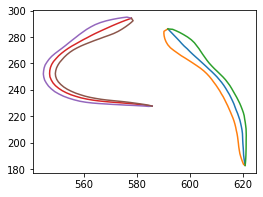

In [56]:
fig, ax = plt.subplots(figsize=(4,3))
for i in [1,2]:
    ax.plot(skel_samples[i,:,0],skel_samples[i,:,1])
    ax.plot(cont1_samples[i,:,0],cont1_samples[i,:,1])
    ax.plot(cont2_samples[i,:,0],cont2_samples[i,:,1])

In [50]:
# cc = con1_array_comb[2,:]
# skel = skel_samples[2]

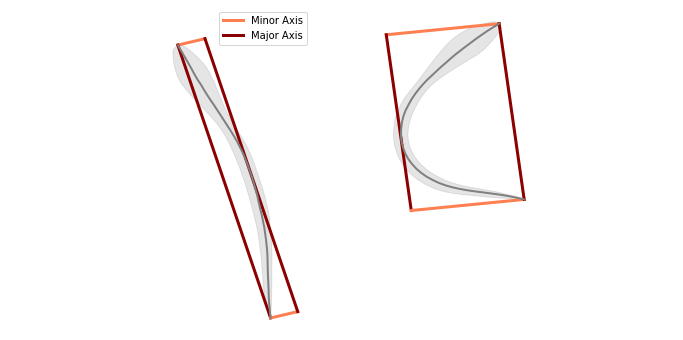

In [77]:
fig, ax = plt.subplots(1,2,figsize=(12,6), sharex=True, sharey=True)
for i, j in enumerate([1,2]):
    skel = skel_samples[j]
    rect = cv2.minAreaRect(skel.astype(np.float32))
    box = cv2.boxPoints(rect)
    
    cc1 = cont1_samples[j]
    cc2 = cont2_samples[j]
    
    c12_x = np.concatenate((cc1[:,0],np.flipud(cc2[:,0])))
    c12_y = np.concatenate((cc1[:,1],np.flipud(cc2[:,1])))
#     axes.fill(c12_x,c12_y, alpha= 0.7, label=skel_len_array[ind])

    
    cols = ['coral', 'darkred']
    hh = []
    for ini, c in enumerate(cols + cols):
        fin = ini+1 if ini <3 else 0
        xx,yy = zip(box[ini], box[fin])
        h, = ax[i].plot(xx, yy, c, lw=3)
        hh.append(h)
    ax[i].plot(skel[:, 0], skel[:, 1], 'gray', lw=2)
    
    ax[i].fill(c12_x,c12_y, color='gray', alpha=0.2)
#     ax[i].axis('equal')
    ax[i].axis('off')
    if i == 0:
        ax[i].legend(hh[:2], ['Minor Axis', 'Major Axis'])
#     ax[i].set_title('Axis')

In [78]:
fig.savefig('./Figures/fig1_quirkiness.svg')